# Importing all the Required Libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Importing the Dataset

In [2]:
file_encoding = 'cp1252'
courses = pd.read_csv("courses_prod_data.csv", encoding=file_encoding)
courses.head()

,course_id,course_name,course_type_label,course_category_name,description,price_inr,rating,learners_count
0,14,Comprehensive Java Course,selfpaced,Programming & Frameworks,This is self-paced online training designed on...,15295,5.0,17379.0
1,23,Business Analytics with R,live,Data Science,Data Analytics with R training will help you g...,19995,5.0,25110.0
2,31,Machine Learning with Mahout,selfpaced,Artificial Intelligence,,8899,5.0,9120.0
3,44,Java/J2EE and SOA,live,Programming & Frameworks,Java certification training by is designed to...,19995,4.0,56850.0
4,46,Pentaho BI,selfpaced,BI and Visualization,,8899,4.0,3737.0


In [3]:
courses.shape

(156, 8)

In [4]:
type(courses)

pandas.core.frame.DataFrame

In [5]:
courses.describe()

,course_id,price_inr,rating,learners_count
count,156.000000,156.000000,155.000000,155.000000
mean,829.134615,29269.897436,4.948387,12126.638710
std,526.577275,46230.970613,0.221961,22775.461856
min,14.000000,4999.000000,4.000000,1.000000
25%,434.500000,8799.000000,5.000000,1663.500000
50%,796.500000,17795.000000,5.000000,5031.000000
75%,1335.000000,21245.000000,5.000000,10619.500000
max,1804.000000,275500.000000,5.000000,167197.000000


In [6]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   course_id             156 non-null    int64  
 1   course_name           156 non-null    object 
 2   course_type_label     156 non-null    object 
 3   course_category_name  153 non-null    object 
 4   description           153 non-null    object 
 5   price_inr             156 non-null    int64  
 6   rating                155 non-null    float64
 7   learners_count        155 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 9.9+ KB


In [7]:
courses.isna().sum()

course_id               0
course_name             0
course_type_label       0
course_category_name    3
description             3
price_inr               0
rating                  1
learners_count          1
dtype: int64

In [8]:
courses2 = courses
courses2

,course_id,course_name,course_type_label,course_category_name,description,price_inr,rating,learners_count
0,14,Comprehensive Java Course,selfpaced,Programming & Frameworks,This is self-paced online training designed on...,15295,5.0,17379.0
1,23,Business Analytics with R,live,Data Science,Data Analytics with R training will help you g...,19995,5.0,25110.0
2,31,Machine Learning with Mahout,selfpaced,Artificial Intelligence,,8899,5.0,9120.0
3,44,Java/J2EE and SOA,live,Programming & Frameworks,Java certification training by is designed to...,19995,4.0,56850.0
4,46,Pentaho BI,selfpaced,BI and Visualization,,8899,4.0,3737.0
...,...,...,...,...,...,...,...,...
151,1690,Microservices Architecture Training,live,Cloud Computing,Microservices course is designed with the help...,17795,5.0,10743.0
152,1696,Salesforce Masters Program,master,Cloud Computing,Salesforce CRM Certification Masters Program i...,39999,5.0,454.0
153,1751,Microsoft Azure AZ 303,live,Cloud Computing,Azure certification training will help you pre...,22995,5.0,12611.0
154,1752,Data Science and ML Internship,internship,Data Science,NaN,21999,5.0,1.0


In [9]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# filling categorical values with "missing" and numerical values with "Mean"
num_imputer = SimpleImputer(strategy="mean")
course_imputer = SimpleImputer(strategy="constant", fill_value="missing")

# defining the column
num_features = ["rating","learners_count"]
course_features = ["course_category_name","description"]

# creating an Imputer
imputer = ColumnTransformer([
    ("num_imputer",num_imputer, num_features),
    ("course_imputer",course_imputer, course_features)
], remainder="passthrough")

# transforming the data
filled_u = imputer.fit_transform(courses2)
filled_u

array([[5.0, 17379.0, 'Programming & Frameworks', ...,
        'Comprehensive Java Course', 'selfpaced', 15295],
       [5.0, 25110.0, 'Data Science', ..., 'Business Analytics with R',
        'live', 19995],
       [5.0, 9120.0, 'Artificial Intelligence', ...,
        'Machine Learning with Mahout', 'selfpaced', 8899],
       ...,
       [5.0, 12611.0, 'Cloud Computing', ..., 'Microsoft Azure AZ 303',
        'live', 22995],
       [5.0, 1.0, 'Data Science', ..., 'Data Science and ML Internship',
        'internship', 21999],
       [5.0, 12126.63870967742, 'Cyber Security', ...,
        'Cyber Security Internship Program', 'internship', 21999]],
      dtype=object)

In [10]:
courses_filled = pd.DataFrame(filled_u,columns=["rating","learners_count","course_category_name","description","course_id",
                                               "course_name","course_type_label","price_inr"])
courses_filled

,rating,learners_count,course_category_name,description,course_id,course_name,course_type_label,price_inr
0,5,17379,Programming & Frameworks,This is self-paced online training designed on...,14,Comprehensive Java Course,selfpaced,15295
1,5,25110,Data Science,Data Analytics with R training will help you g...,23,Business Analytics with R,live,19995
2,5,9120,Artificial Intelligence,,31,Machine Learning with Mahout,selfpaced,8899
3,4,56850,Programming & Frameworks,Java certification training by is designed to...,44,Java/J2EE and SOA,live,19995
4,4,3737,BI and Visualization,,46,Pentaho BI,selfpaced,8899
...,...,...,...,...,...,...,...,...
151,5,10743,Cloud Computing,Microservices course is designed with the help...,1690,Microservices Architecture Training,live,17795
152,5,454,Cloud Computing,Salesforce CRM Certification Masters Program i...,1696,Salesforce Masters Program,master,39999
153,5,12611,Cloud Computing,Azure certification training will help you pre...,1751,Microsoft Azure AZ 303,live,22995
154,5,1,Data Science,missing,1752,Data Science and ML Internship,internship,21999


In [11]:
courses_filled.isna().sum()

rating                  0
learners_count          0
course_category_name    0
description             0
course_id               0
course_name             0
course_type_label       0
price_inr               0
dtype: int64

In [12]:
from sklearn.feature_extraction import text
stop = text.ENGLISH_STOP_WORDS
len(stop)

courses_filled['description'] = courses_filled['description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
courses_filled1 = courses_filled
courses_filled1

,rating,learners_count,course_category_name,description,course_id,course_name,course_type_label,price_inr
0,5,17379,Programming & Frameworks,This self-paced online training designed popul...,14,Comprehensive Java Course,selfpaced,15295
1,5,25110,Data Science,Data Analytics R training help gain expertise ...,23,Business Analytics with R,live,19995
2,5,9120,Artificial Intelligence,,31,Machine Learning with Mahout,selfpaced,8899
3,4,56850,Programming & Frameworks,Java certification training designed meet indu...,44,Java/J2EE and SOA,live,19995
4,4,3737,BI and Visualization,,46,Pentaho BI,selfpaced,8899
...,...,...,...,...,...,...,...,...
151,5,10743,Cloud Computing,Microservices course designed help industry ex...,1690,Microservices Architecture Training,live,17795
152,5,454,Cloud Computing,Salesforce CRM Certification Masters Program d...,1696,Salesforce Masters Program,master,39999
153,5,12611,Cloud Computing,Azure certification training help prepare new ...,1751,Microsoft Azure AZ 303,live,22995
154,5,1,Data Science,missing,1752,Data Science and ML Internship,internship,21999


In [13]:
courses_filled1.to_csv("file_new_main_m.csv",index=False)

In [14]:
def absolute_maximum_scale(series):
    return series / series.abs().max()
for col in courses_filled.columns:
    courses_filled1[['learners_count','price_inr']] = absolute_maximum_scale(courses_filled1[['learners_count','price_inr']])

courses_filled1

,rating,learners_count,course_category_name,description,course_id,course_name,course_type_label,price_inr
0,5,0.103943,Programming & Frameworks,This self-paced online training designed popul...,14,Comprehensive Java Course,selfpaced,0.0555172
1,5,0.150182,Data Science,Data Analytics R training help gain expertise ...,23,Business Analytics with R,live,0.0725771
2,5,0.0545464,Artificial Intelligence,,31,Machine Learning with Mahout,selfpaced,0.0323013
3,4,0.340018,Programming & Frameworks,Java certification training designed meet indu...,44,Java/J2EE and SOA,live,0.0725771
4,4,0.0223509,BI and Visualization,,46,Pentaho BI,selfpaced,0.0323013
...,...,...,...,...,...,...,...,...
151,5,0.0642535,Cloud Computing,Microservices course designed help industry ex...,1690,Microservices Architecture Training,live,0.0645917
152,5,0.00271536,Cloud Computing,Salesforce CRM Certification Masters Program d...,1696,Salesforce Masters Program,master,0.145187
153,5,0.075426,Cloud Computing,Azure certification training help prepare new ...,1751,Microsoft Azure AZ 303,live,0.0834664
154,5,5.98097e-06,Data Science,missing,1752,Data Science and ML Internship,internship,0.0798512


In [15]:
courses_filled1.to_csv("file_new_main1.csv",index=False)

In [16]:
Final = pd.read_csv("file_new_main1.csv")
Final

,rating,learners_count,course_category_name,description,course_id,course_name,course_type_label,price_inr
0,5.0,0.103943,Programming & Frameworks,This self-paced online training designed popul...,14,Comprehensive Java Course,selfpaced,0.055517
1,5.0,0.150182,Data Science,Data Analytics R training help gain expertise ...,23,Business Analytics with R,live,0.072577
2,5.0,0.054546,Artificial Intelligence,NaN,31,Machine Learning with Mahout,selfpaced,0.032301
3,4.0,0.340018,Programming & Frameworks,Java certification training designed meet indu...,44,Java/J2EE and SOA,live,0.072577
4,4.0,0.022351,BI and Visualization,NaN,46,Pentaho BI,selfpaced,0.032301
...,...,...,...,...,...,...,...,...
151,5.0,0.064254,Cloud Computing,Microservices course designed help industry ex...,1690,Microservices Architecture Training,live,0.064592
152,5.0,0.002715,Cloud Computing,Salesforce CRM Certification Masters Program d...,1696,Salesforce Masters Program,master,0.145187
153,5.0,0.075426,Cloud Computing,Azure certification training help prepare new ...,1751,Microsoft Azure AZ 303,live,0.083466
154,5.0,0.000006,Data Science,missing,1752,Data Science and ML Internship,internship,0.079851


In [17]:
Final_str = courses_filled1.astype(str)
Final_str

,rating,learners_count,course_category_name,description,course_id,course_name,course_type_label,price_inr
0,5.0,0.10394325257032123,Programming & Frameworks,This self-paced online training designed popul...,14,Comprehensive Java Course,selfpaced,0.05551724137931034
1,5.0,0.15018212049259258,Data Science,Data Analytics R training help gain expertise ...,23,Business Analytics with R,live,0.07257713248638839
2,5.0,0.05454643324940041,Artificial Intelligence,,31,Machine Learning with Mahout,selfpaced,0.03230127041742287
3,4.0,0.3400180625250453,Programming & Frameworks,Java certification training designed meet indu...,44,Java/J2EE and SOA,live,0.07257713248638839
4,4.0,0.02235087950142646,BI and Visualization,,46,Pentaho BI,selfpaced,0.03230127041742287
...,...,...,...,...,...,...,...,...
151,5.0,0.06425354521911278,Cloud Computing,Microservices course designed help industry ex...,1690,Microservices Architecture Training,live,0.06459165154264973
152,5.0,0.0027153597253539237,Cloud Computing,Salesforce CRM Certification Masters Program d...,1696,Salesforce Masters Program,master,0.1451869328493648
153,5.0,0.07542599448554699,Cloud Computing,Azure certification training help prepare new ...,1751,Microsoft Azure AZ 303,live,0.08346642468239564
154,5.0,5.980968558048291e-06,Data Science,missing,1752,Data Science and ML Internship,internship,0.07985117967332124


In [18]:
Final_str['Summary'] = Final_str[['course_category_name','description','course_type_label','price_inr','rating','learners_count']].apply(lambda x: ' '.join(x), axis=1)
Final_str

,rating,learners_count,course_category_name,description,course_id,course_name,course_type_label,price_inr,Summary
0,5.0,0.10394325257032123,Programming & Frameworks,This self-paced online training designed popul...,14,Comprehensive Java Course,selfpaced,0.05551724137931034,Programming & Frameworks This self-paced onlin...
1,5.0,0.15018212049259258,Data Science,Data Analytics R training help gain expertise ...,23,Business Analytics with R,live,0.07257713248638839,Data Science Data Analytics R training help ga...
2,5.0,0.05454643324940041,Artificial Intelligence,,31,Machine Learning with Mahout,selfpaced,0.03230127041742287,Artificial Intelligence selfpaced 0.032301270...
3,4.0,0.3400180625250453,Programming & Frameworks,Java certification training designed meet indu...,44,Java/J2EE and SOA,live,0.07257713248638839,Programming & Frameworks Java certification tr...
4,4.0,0.02235087950142646,BI and Visualization,,46,Pentaho BI,selfpaced,0.03230127041742287,BI and Visualization selfpaced 0.032301270417...
...,...,...,...,...,...,...,...,...,...
151,5.0,0.06425354521911278,Cloud Computing,Microservices course designed help industry ex...,1690,Microservices Architecture Training,live,0.06459165154264973,Cloud Computing Microservices course designed ...
152,5.0,0.0027153597253539237,Cloud Computing,Salesforce CRM Certification Masters Program d...,1696,Salesforce Masters Program,master,0.1451869328493648,Cloud Computing Salesforce CRM Certification M...
153,5.0,0.07542599448554699,Cloud Computing,Azure certification training help prepare new ...,1751,Microsoft Azure AZ 303,live,0.08346642468239564,Cloud Computing Azure certification training h...
154,5.0,5.980968558048291e-06,Data Science,missing,1752,Data Science and ML Internship,internship,0.07985117967332124,Data Science missing internship 0.079851179673...


In [19]:
Final_main = Final_str[['course_id','course_name','Summary']]
Final_main

,course_id,course_name,Summary
0,14,Comprehensive Java Course,Programming & Frameworks This self-paced onlin...
1,23,Business Analytics with R,Data Science Data Analytics R training help ga...
2,31,Machine Learning with Mahout,Artificial Intelligence selfpaced 0.032301270...
3,44,Java/J2EE and SOA,Programming & Frameworks Java certification tr...
4,46,Pentaho BI,BI and Visualization selfpaced 0.032301270417...
...,...,...,...
151,1690,Microservices Architecture Training,Cloud Computing Microservices course designed ...
152,1696,Salesforce Masters Program,Cloud Computing Salesforce CRM Certification M...
153,1751,Microsoft Azure AZ 303,Cloud Computing Azure certification training h...
154,1752,Data Science and ML Internship,Data Science missing internship 0.079851179673...


In [20]:
Final_main.to_csv("final_main_ABS_MAX_SCALED.csv",index=False)

In [21]:
Final_main.head(1)['Summary']

0    Programming & Frameworks This self-paced onlin...
Name: Summary, dtype: object

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tvf = TfidfVectorizer(min_df=3,max_features=None,strip_accents='unicode', 
                      analyzer='word',token_pattern=r'\w{1,}',ngram_range=(1,3),stop_words='english')
tvf_matrix = tvf.fit_transform(Final_main['Summary'])
tvf_matrix

tvf_matrix.shape

(156, 755)

In [23]:
from sklearn.metrics.pairwise import sigmoid_kernel

sig = sigmoid_kernel(tvf_matrix, tvf_matrix)

In [24]:
sig[0]

array([0.76214985, 0.76162992, 0.76163494, 0.76190205, 0.76162397,
       0.76162482, 0.76162694, 0.76170531, 0.76162827, 0.76164568,
       0.76178009, 0.76172091, 0.76169627, 0.76163911, 0.76163029,
       0.76163365, 0.76162924, 0.76163695, 0.76162576, 0.76161264,
       0.76162618, 0.76165115, 0.76165522, 0.76161251, 0.76163119,
       0.76169627, 0.76163282, 0.76163936, 0.76165002, 0.76168696,
       0.76161827, 0.76166786, 0.76163357, 0.76164568, 0.76164334,
       0.7616295 , 0.76164409, 0.76164454, 0.76169862, 0.76162061,
       0.76160629, 0.76162042, 0.76165916, 0.76160688, 0.76160164,
       0.76161765, 0.76163456, 0.76162718, 0.7616108 , 0.76162719,
       0.76161293, 0.76160467, 0.76160672, 0.761634  , 0.76161794,
       0.76161619, 0.76165923, 0.76163456, 0.76162718, 0.76163254,
       0.76163384, 0.76160465, 0.76161033, 0.76162571, 0.76163355,
       0.76161739, 0.76169701, 0.76161657, 0.76162679, 0.76164337,
       0.76162718, 0.7616236 , 0.76169862, 0.76160508, 0.76165

In [25]:
indices = pd.Series(Final_main.index.values, index=Final_main['course_name']).drop_duplicates()
indices

course_name
Comprehensive Java Course                0
Business Analytics with R                1
Machine Learning with Mahout             2
Java/J2EE and SOA                        3
Pentaho BI                               4
                                      ... 
Microservices Architecture Training    151
Salesforce Masters Program             152
Microsoft Azure AZ 303                 153
Data Science and ML Internship         154
Cyber Security Internship Program      155
Length: 156, dtype: int64

In [26]:
indices['DevOps']

127

In [27]:
sig[127]

array([0.76161442, 0.76164776, 0.76161288, 0.76163736, 0.76160637,
       0.76160671, 0.76161964, 0.76163068, 0.76166616, 0.76161781,
       0.76161868, 0.76164484, 0.76161243, 0.76167966, 0.76160506,
       0.76160812, 0.76161026, 0.76161381, 0.76161913, 0.76161238,
       0.76161785, 0.76162033, 0.76166134, 0.76161633, 0.76161116,
       0.76161243, 0.76161191, 0.7616345 , 0.76161717, 0.76161076,
       0.76160782, 0.76161648, 0.76161225, 0.76161781, 0.76161674,
       0.76162163, 0.76169745, 0.76164866, 0.76161284, 0.76169744,
       0.76163106, 0.76162257, 0.76161661, 0.76162458, 0.76162158,
       0.76161957, 0.76161271, 0.76162989, 0.76162475, 0.76164823,
       0.7616575 , 0.76163232, 0.76182322, 0.76161245, 0.76161873,
       0.76163978, 0.76163048, 0.76161271, 0.76160768, 0.76161809,
       0.76174905, 0.76161328, 0.76161772, 0.76171735, 0.76161224,
       0.76161929, 0.76161267, 0.7616263 , 0.7616225 , 0.76164806,
       0.76161983, 0.76162601, 0.76161284, 0.76160715, 0.76180

In [28]:
list(enumerate(sig[indices['DevOps']]))

[(0, 0.7616144210541198),
 (1, 0.7616477591467004),
 (2, 0.7616128814629468),
 (3, 0.7616373618439052),
 (4, 0.7616063680539497),
 (5, 0.7616067145357487),
 (6, 0.7616196360725844),
 (7, 0.7616306765893323),
 (8, 0.7616661636311827),
 (9, 0.7616178122903642),
 (10, 0.7616186838763305),
 (11, 0.7616448385701011),
 (12, 0.761612425674178),
 (13, 0.7616796576537253),
 (14, 0.7616050634727639),
 (15, 0.7616081240176598),
 (16, 0.7616102640146352),
 (17, 0.7616138064849929),
 (18, 0.76161912588778),
 (19, 0.7616123810486682),
 (20, 0.7616178466910831),
 (21, 0.7616203267150661),
 (22, 0.7616613423804734),
 (23, 0.7616163330840507),
 (24, 0.7616111591353875),
 (25, 0.761612425674178),
 (26, 0.7616119080335464),
 (27, 0.7616344965676074),
 (28, 0.7616171714757587),
 (29, 0.761610759922307),
 (30, 0.7616078198880265),
 (31, 0.7616164786400423),
 (32, 0.7616122541086106),
 (33, 0.7616178122903642),
 (34, 0.7616167388708694),
 (35, 0.761621632631039),
 (36, 0.7616974453081419),
 (37, 0.761648663

In [29]:
sorted(list(enumerate(sig[indices['DevOps']])),key=lambda x:x[1], reverse=True)

[(127, 0.7621498524869474),
 (77, 0.7618399800721136),
 (52, 0.7618232196405179),
 (74, 0.7618072718146885),
 (130, 0.761751534307968),
 (114, 0.7617496879230262),
 (60, 0.7617490470291746),
 (148, 0.7617434246984545),
 (149, 0.7617284701554647),
 (136, 0.7617187454984939),
 (63, 0.761717348217767),
 (93, 0.7617027093278077),
 (79, 0.761702617483458),
 (36, 0.7616974453081419),
 (39, 0.7616974401588944),
 (98, 0.7616958011851143),
 (81, 0.7616944758506361),
 (91, 0.7616835161047243),
 (13, 0.7616796576537253),
 (76, 0.7616712568078793),
 (78, 0.7616712568078793),
 (88, 0.7616711752600949),
 (143, 0.7616698745785027),
 (85, 0.7616681497266908),
 (8, 0.7616661636311827),
 (92, 0.7616650460531875),
 (22, 0.7616613423804734),
 (116, 0.7616611486859358),
 (94, 0.7616604043685565),
 (105, 0.7616585444758305),
 (50, 0.7616575003733439),
 (112, 0.7616572837217435),
 (151, 0.7616568089002789),
 (118, 0.7616550793357543),
 (80, 0.761654834727395),
 (83, 0.7616543047861039),
 (146, 0.761653676364

In [30]:
def give_rec(title, sig=sig):
    idx = indices[title]
    sig_scores = list(enumerate(sig[idx]))
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)
    sig_scores = sig_scores[1:11]
    course_indices = [i[0] for i in sig_scores]
    return Final_main['course_name'].iloc[course_indices], sig_scores

In [31]:
give_rec('DevOps')

(77     Continuous Testing in DevOps Training
 52           DevOps Engineer Masters Program
 74                                AWS DevOps
 130                               PGP DevOps
 114          Microsoft Azure DevOps Solution
 60        Ethereum Development Certification
 148                    Ansible Certification
 149       Continous Integration with Jenkins
 136                               Git Course
 63                              Microsoft BI
 Name: course_name, dtype: object,
 [(77, 0.7618399800721136),
  (52, 0.7618232196405179),
  (74, 0.7618072718146885),
  (130, 0.761751534307968),
  (114, 0.7617496879230262),
  (60, 0.7617490470291746),
  (148, 0.7617434246984545),
  (149, 0.7617284701554647),
  (136, 0.7617187454984939),
  (63, 0.761717348217767)])

In [32]:
give_rec('Microservices Architecture Training')

(41       AWS SysOps Administrator Training and Certifica
 47                                             Cassandra
 109                    Django Training and Certification
 71                             NLP using Python Training
 137                             Microsoft .NET Framework
 40                       Cloud Architect Masters Program
 116    Google Cloud Platform Fundamentals Certificati...
 49                 Big Data For ETL and Data Warehousing
 7                                       Spring Framework
 79                       Salesforce Platform Developer I
 Name: course_name, dtype: object,
 [(41, 0.7618669070596277),
  (47, 0.7618428570263835),
  (109, 0.7618316658595834),
  (71, 0.7618158774022757),
  (137, 0.7617890621982338),
  (40, 0.7617365722872571),
  (116, 0.761735972076834),
  (49, 0.7617257747855088),
  (7, 0.7617239466920405),
  (79, 0.7617201437117442)])

In [33]:
title = input('Enter the Course Name : ')
give_rec(title)

Enter the Course Name : Big Data For ETL and Data Warehousing


(68     Python Spark Certification Training using PySpark
 85        Blockchain and Ethereum Certification Training
 89                                Apache Spark and Scala
 93                                            Kubernetes
 88                                   Big Data and Hadoop
 146                       Snowflake Certification Course
 19                  Mastering in Data WareHousing and BI
 39             Informatica PowerCenter 9.X Dev and Admin
 62                    Big Data Architect Masters Program
 151                  Microservices Architecture Training
 Name: course_name, dtype: object,
 [(68, 0.7620105320071038),
  (85, 0.7618954235643389),
  (89, 0.7618655740536923),
  (93, 0.7617494854730489),
  (88, 0.7617478167701184),
  (146, 0.7617475085973476),
  (19, 0.7617439360629936),
  (39, 0.7617342269433065),
  (62, 0.7617270143880942),
  (151, 0.7617257747855088)])

In [34]:
title = input('Enter the Course Name : ')
give_rec(title)

Enter the Course Name : Informatica PowerCenter 9.X Dev and Admin


(60        Ethereum Development Certification
 5                           Data Warehousing
 19      Mastering in Data WareHousing and BI
 63                              Microsoft BI
 79           Salesforce Platform Developer I
 146           Snowflake Certification Course
 37                              Data Science
 74                                AWS DevOps
 49     Big Data For ETL and Data Warehousing
 1                  Business Analytics with R
 Name: course_name, dtype: object,
 [(60, 0.7619647944678478),
  (5, 0.7619003086981522),
  (19, 0.7618993491776574),
  (63, 0.7618889660860451),
  (79, 0.7618537237874499),
  (146, 0.7618461359439699),
  (37, 0.7617517527350899),
  (74, 0.7617500124836218),
  (49, 0.7617342269433065),
  (1, 0.7617300971948315)])

In [35]:
title = input('Enter the Course Name : ')
give_rec(title)

Enter the Course Name : Data Warehousing


(39     Informatica PowerCenter 9.X Dev and Admin
 19          Mastering in Data WareHousing and BI
 146               Snowflake Certification Course
 29              Mastering Magento for E-Commerce
 58            Advanced Predictive Modelling in R
 18                          Six Sigma Green Belt
 4                                     Pentaho BI
 14                             Comprehensive Pig
 23                               AWS Development
 119                       Reinforcement Learning
 Name: course_name, dtype: object,
 [(39, 0.7619003086981522),
  (19, 0.7618558241152439),
  (146, 0.7618250638863227),
  (29, 0.7617835975537597),
  (58, 0.7617827274292168),
  (18, 0.7617628552132792),
  (4, 0.7617533333192029),
  (14, 0.7617462266002599),
  (23, 0.7617438490433693),
  (119, 0.7617194559349899)])

# Second Memory Based Model - Bag of Words

### Using our Main DataFrame 

In [36]:
Final_main

,course_id,course_name,Summary
0,14,Comprehensive Java Course,Programming & Frameworks This self-paced onlin...
1,23,Business Analytics with R,Data Science Data Analytics R training help ga...
2,31,Machine Learning with Mahout,Artificial Intelligence selfpaced 0.032301270...
3,44,Java/J2EE and SOA,Programming & Frameworks Java certification tr...
4,46,Pentaho BI,BI and Visualization selfpaced 0.032301270417...
...,...,...,...
151,1690,Microservices Architecture Training,Cloud Computing Microservices course designed ...
152,1696,Salesforce Masters Program,Cloud Computing Salesforce CRM Certification M...
153,1751,Microsoft Azure AZ 303,Cloud Computing Azure certification training h...
154,1752,Data Science and ML Internship,Data Science missing internship 0.079851179673...


In [37]:
Final_main['Summary'] = Final_main['Summary'].apply(lambda x:x.lower())
Final_main

<ipython-input-37-5cbd74daae69>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final_main['Summary'] = Final_main['Summary'].apply(lambda x:x.lower())


,course_id,course_name,Summary
0,14,Comprehensive Java Course,programming & frameworks this self-paced onlin...
1,23,Business Analytics with R,data science data analytics r training help ga...
2,31,Machine Learning with Mahout,artificial intelligence selfpaced 0.032301270...
3,44,Java/J2EE and SOA,programming & frameworks java certification tr...
4,46,Pentaho BI,bi and visualization selfpaced 0.032301270417...
...,...,...,...
151,1690,Microservices Architecture Training,cloud computing microservices course designed ...
152,1696,Salesforce Masters Program,cloud computing salesforce crm certification m...
153,1751,Microsoft Azure AZ 303,cloud computing azure certification training h...
154,1752,Data Science and ML Internship,data science missing internship 0.079851179673...


In [38]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

In [39]:
def stem(text):
    y = []
    
    for i in text.split():
        y.append(ps.stem(i))
        
    return " ".join(y)

In [40]:
Final_main['Summary'] = Final_main['Summary'].apply(stem)
Final_main

<ipython-input-40-9d3e8ca146b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final_main['Summary'] = Final_main['Summary'].apply(stem)


,course_id,course_name,Summary
0,14,Comprehensive Java Course,program & framework thi self-pac onlin train d...
1,23,Business Analytics with R,data scienc data analyt r train help gain expe...
2,31,Machine Learning with Mahout,artifici intellig selfpac 0.03230127041742287 ...
3,44,Java/J2EE and SOA,program & framework java certif train design m...
4,46,Pentaho BI,bi and visual selfpac 0.03230127041742287 4.0 ...
...,...,...,...
151,1690,Microservices Architecture Training,cloud comput microservic cours design help ind...
152,1696,Salesforce Masters Program,cloud comput salesforc crm certif master progr...
153,1751,Microsoft Azure AZ 303,cloud comput azur certif train help prepar new...
154,1752,Data Science and ML Internship,data scienc miss internship 0.0798511796733212...


In [41]:
Final_main.to_csv("new_courses_data.csv",index=False)

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=5000, stop_words='english')

In [43]:
vectors = cv.fit_transform(Final_main['Summary']).toarray()
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [44]:
cv.get_feature_names()

['00029306745934436625',
 '0006040778243628773',
 '0013995466425833',
 '0014174895482574447',
 '0014354324539315897',
 '0017823286302983904',
 '0022189393350359157',
 '0027153597253539237',
 '0028947887820953725',
 '003128046555859256',
 '0033254185182748494',
 '0034569998265519116',
 '0035526953234806843',
 '0037381053487801816',
 '003827819877150906',
 '00517951877126982',
 '005293157173872737',
 '005753691752842455',
 '006602989288085313',
 '006662798973665796',
 '006692703816456037',
 '007153238395425756',
 '007159219363983804',
 '0075300394145827974',
 '007882916559507647',
 '008247755641548593',
 '008367375012709559',
 '008660442472053925',
 '008786042811772938',
 '008857814434469518',
 '00902528155409487',
 '00919872964227827',
 '00965328325268994',
 '009802807466641148',
 '010095874925985513',
 '010819572121509358',
 '011004982146808855',
 '011782508059355132',
 '01206959455014145',
 '01231481426102143',
 '012392566852276058',
 '012434433632182395',
 '013134206953474045',
 '013

In [45]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(vectors)

In [46]:
similarity

array([[1.        , 0.06289709, 0.07559289, ..., 0.11230589, 0.        ,
        0.        ],
       [0.06289709, 1.        , 0.        , ..., 0.14127427, 0.32816506,
        0.        ],
       [0.07559289, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.11230589, 0.14127427, 0.        , ..., 1.        , 0.0358748 ,
        0.        ],
       [0.        , 0.32816506, 0.        , ..., 0.0358748 , 1.        ,
        0.46291005],
       [0.        , 0.        , 0.        , ..., 0.        , 0.46291005,
        1.        ]])

In [47]:
similarity.shape

(156, 156)

In [48]:
def recommend(course,similarity = similarity):
    idx = indices[course]
    sim_scores = list(enumerate(similarity[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]
    course_indices = [i[0] for i in sim_scores]
    recommended = Final_main['course_name'].iloc[course_indices]
    print("Top 5 Recommended Courses are:\n {}".format(recommended), end = ' ')
    print("\n With Similarity Scores:\n {}".format(sim_scores))

In [75]:
indices

course_name
Comprehensive Java Course                0
Business Analytics with R                1
Machine Learning with Mahout             2
Java/J2EE and SOA                        3
Pentaho BI                               4
                                      ... 
Microservices Architecture Training    151
Salesforce Masters Program             152
Microsoft Azure AZ 303                 153
Data Science and ML Internship         154
Cyber Security Internship Program      155
Length: 156, dtype: int64

In [49]:
recommend('DevOps')

Top 5 Recommended Courses are:
 52           DevOps Engineer Masters Program
130                               PGP DevOps
114          Microsoft Azure DevOps Solution
77     Continuous Testing in DevOps Training
74                                AWS DevOps
Name: course_name, dtype: object 
 With Similarity Scores:
 [(52, 0.4854990900003671), (130, 0.43551638661232533), (114, 0.3940062612820494), (77, 0.3651483716701107), (74, 0.3077287274483318)]


In [50]:
course = input('Enter the Course Name : ')
recommend(course)

Enter the Course Name : Continuous Testing in DevOps Training
Top 5 Recommended Courses are:
 81        Automation Engineer Masters Program
76     Software Testing Fundamentals Training
78                  Mobile Automation Testing
80           Performance Testing Using JMeter
127                                    DevOps
Name: course_name, dtype: object 
 With Similarity Scores:
 [(81, 0.5157367029590281), (76, 0.4824181513244218), (78, 0.42211588240886905), (80, 0.37674325988790797), (127, 0.3651483716701107)]


In [73]:
import pickle

pickle.dump(Final_main.to_dict(), open('course_dict.pkl','wb'))

In [74]:
pickle.dump(similarity,open('similarity.pkl','wb'))

# User Based Collaborative Filtering

In [51]:
file_encoding = 'cp1252'
rating = pd.read_csv("rating.csv",encoding=file_encoding)
rating

,user_id,course_id,rating
0,1,23,5.0
1,25578,31,5.0
2,30992,14,5.0
3,33176,23,5.0
4,38488,44,4.0
...,...,...,...
265790,2162899,1672,5.0
265791,2160034,1536,5.0
265792,2050044,1414,5.0
265793,2162924,929,5.0


In [52]:
rating.describe()

,user_id,course_id,rating
count,2.657950e+05,265795.000000,265561.000000
mean,8.123343e+05,676.063658,4.929542
std,6.519431e+05,389.032509,0.255918
min,1.000000e+00,14.000000,4.000000
25%,2.505935e+05,482.000000,5.000000
50%,5.887840e+05,631.000000,5.000000
75%,1.388068e+06,888.000000,5.000000
max,2.162932e+06,1804.000000,5.000000


In [53]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265795 entries, 0 to 265794
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    265795 non-null  int64  
 1   course_id  265795 non-null  int64  
 2   rating     265561 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 6.1 MB


In [54]:
rating.isna().sum()

user_id        0
course_id      0
rating       234
dtype: int64

In [55]:
rating.dropna(subset=["rating"],inplace=True)
rating.isna().sum()

user_id      0
course_id    0
rating       0
dtype: int64

In [56]:
rating.head(20)

,user_id,course_id,rating
0,1,23,5.0
1,25578,31,5.0
2,30992,14,5.0
3,33176,23,5.0
4,38488,44,4.0
5,38755,44,4.0
6,25502,44,4.0
7,45212,44,4.0
8,45223,44,4.0
9,19016,44,4.0


In [57]:
print('The Rating Dataset has',rating['user_id'].nunique(),'unique Users')
print('The Rating Dataset has',rating['course_id'].nunique(),'unique Courses')
print('The Rating Dataset has',rating['rating'].nunique(),'unique Ratings')
print('The Unique Ratings are',sorted(rating['rating'].unique()))

The Rating Dataset has 109725 unique Users
The Rating Dataset has 154 unique Courses
The Rating Dataset has 2 unique Ratings
The Unique Ratings are [4.0, 5.0]


In [58]:
courses = pd.read_csv("new_courses_data.csv")
courses

,course_id,course_name,Summary
0,14,Comprehensive Java Course,program & framework thi self-pac onlin train d...
1,23,Business Analytics with R,data scienc data analyt r train help gain expe...
2,31,Machine Learning with Mahout,artifici intellig selfpac 0.03230127041742287 ...
3,44,Java/J2EE and SOA,program & framework java certif train design m...
4,46,Pentaho BI,bi and visual selfpac 0.03230127041742287 4.0 ...
...,...,...,...
151,1690,Microservices Architecture Training,cloud comput microservic cours design help ind...
152,1696,Salesforce Masters Program,cloud comput salesforc crm certif master progr...
153,1751,Microsoft Azure AZ 303,cloud comput azur certif train help prepar new...
154,1752,Data Science and ML Internship,data scienc miss internship 0.0798511796733212...


In [59]:
df = pd.merge(rating,courses,on='course_id', how='inner')
df

,user_id,course_id,rating,course_name,Summary
0,1,23,5.0,Business Analytics with R,data scienc data analyt r train help gain expe...
1,33176,23,5.0,Business Analytics with R,data scienc data analyt r train help gain expe...
2,21824,23,5.0,Business Analytics with R,data scienc data analyt r train help gain expe...
3,38040,23,5.0,Business Analytics with R,data scienc data analyt r train help gain expe...
4,180440,23,5.0,Business Analytics with R,data scienc data analyt r train help gain expe...
...,...,...,...,...,...
265556,2160813,1804,5.0,Cyber Security Internship Program,cyber secur miss internship 0.0798511796733212...
265557,2158968,1804,5.0,Cyber Security Internship Program,cyber secur miss internship 0.0798511796733212...
265558,2159308,1804,5.0,Cyber Security Internship Program,cyber secur miss internship 0.0798511796733212...
265559,2154069,1804,5.0,Cyber Security Internship Program,cyber secur miss internship 0.0798511796733212...


In [60]:
agg_ratings = df.groupby('course_name').agg(mean_rating = ('rating','mean'),
                                           number_of_ratings = ('rating','count')).reset_index()

In [61]:
agg_ratings

,course_name,mean_rating,number_of_ratings
0,AWS Architect Certification Training,5.0,3258
1,AWS DevOps,5.0,6858
2,AWS Development,4.0,2650
3,AWS Masters Program,5.0,266
4,AWS SysOps Administrator Training and Certifica,5.0,921
...,...,...,...
149,TestComplete,5.0,555
150,Testing With Selenium WebDriver,5.0,3109
151,The Complete WebDeveloper,5.0,775
152,Web Developer Masters Program,5.0,25


In [62]:
agg_ratings.to_csv("agg_ratings_data.csv",index=False)

In [63]:
agg_ratings_40 = agg_ratings[agg_ratings['number_of_ratings']>100]
agg_ratings_40.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 0 to 151
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   course_name        130 non-null    object 
 1   mean_rating        130 non-null    float64
 2   number_of_ratings  130 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 4.1+ KB


In [64]:
agg_ratings_40.sort_values(by = 'number_of_ratings', ascending=False).head()

,course_name,mean_rating,number_of_ratings
22,Big Data and Hadoop,5.0,23686
129,Python Scripting,5.0,13105
51,Data Visualization with Tableau,5.0,9616
93,Mastering Python,5.0,8109
56,DevOps,5.0,6988


In [65]:
import scipy.stats
import seaborn as sns

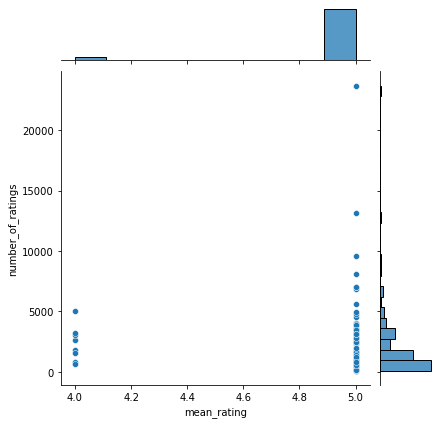

In [66]:
sns.jointplot(x='mean_rating', y='number_of_ratings', data=agg_ratings_40)

In [67]:
df_40 = pd.merge(df,agg_ratings_40[['course_name']],on='course_name', how='inner')
df_40

,user_id,course_id,rating,course_name,Summary
0,1,23,5.0,Business Analytics with R,data scienc data analyt r train help gain expe...
1,33176,23,5.0,Business Analytics with R,data scienc data analyt r train help gain expe...
2,21824,23,5.0,Business Analytics with R,data scienc data analyt r train help gain expe...
3,38040,23,5.0,Business Analytics with R,data scienc data analyt r train help gain expe...
4,180440,23,5.0,Business Analytics with R,data scienc data analyt r train help gain expe...
...,...,...,...,...,...
264467,2149461,1752,5.0,Data Science and ML Internship,data scienc miss internship 0.0798511796733212...
264468,2118395,1752,5.0,Data Science and ML Internship,data scienc miss internship 0.0798511796733212...
264469,2137308,1752,5.0,Data Science and ML Internship,data scienc miss internship 0.0798511796733212...
264470,2160058,1752,5.0,Data Science and ML Internship,data scienc miss internship 0.0798511796733212...


In [68]:
df_40.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264472 entries, 0 to 264471
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   user_id      264472 non-null  int64  
 1   course_id    264472 non-null  int64  
 2   rating       264472 non-null  float64
 3   course_name  264472 non-null  object 
 4   Summary      264472 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 12.1+ MB


In [69]:
print('The Rating Dataset has',df_40['user_id'].nunique(),'unique Users')
print('The Rating Dataset has',df_40['course_id'].nunique(),'unique Courses')
print('The Rating Dataset has',df_40['rating'].nunique(),'unique Ratings')
print('The Unique Ratings are',sorted(df_40['rating'].unique()))

The Rating Dataset has 109343 unique Users
The Rating Dataset has 130 unique Courses
The Rating Dataset has 2 unique Ratings
The Unique Ratings are [4.0, 5.0]


In [70]:
matrix = df_40.pivot_table(index='user_id',columns='course_name',values='rating')
matrix

course_name,AWS Architect Certification Training,AWS DevOps,AWS Development,AWS Masters Program,AWS SysOps Administrator Training and Certifica,Advanced Java,Advanced MS Excel,Advanced Predictive Modelling in R,Analytics for Retail Banks,Android Development,...,Six Sigma Green Belt,Snowflake Certification Course,Software Testing,Software Testing Fundamentals Training,Splunk Developer and Admin,Spring Framework,Statistics Essentials for Analytics,TestComplete,Testing With Selenium WebDriver,The Complete WebDeveloper
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2162634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2162826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2162899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
matrix_norm = matrix.subtract(matrix.mean(axis=1), axis='rows')
matrix_norm

course_name,AWS Architect Certification Training,AWS DevOps,AWS Development,AWS Masters Program,AWS SysOps Administrator Training and Certifica,Advanced Java,Advanced MS Excel,Advanced Predictive Modelling in R,Analytics for Retail Banks,Android Development,...,Six Sigma Green Belt,Snowflake Certification Course,Software Testing,Software Testing Fundamentals Training,Splunk Developer and Admin,Spring Framework,Statistics Essentials for Analytics,TestComplete,Testing With Selenium WebDriver,The Complete WebDeveloper
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.2,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2162634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2162826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2162899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
user_similarity = matrix_norm.T.corr()
user_similarity

MemoryError: Unable to allocate 89.1 GiB for an array with shape (109343, 109343) and data type float64

In [ ]:
n_users = df_40.user_id.unique().shape[0]
n_users

In [ ]:
n_items = df_40.course_id.unique().shape[0]
n_items

In [ ]:
from sklearn import cross_validation as cv
train_data, test_data = cv.train_test_split(df_40, test_size=0.25)

In [ ]:
matrix = df_40.pivot_table(index='course_name',columns='user_id',values='rating')
matrix

In [ ]:
matrix_norm = matrix.subtract(matrix.mean(axis=1), axis='rows')
matrix_norm

In [ ]:
matrix_df = pd.DataFrame(matrix)
matrix_df

In [ ]:
matrix_df.fillna(0)

In [ ]:
matrix_df.isna().sum()

In [ ]:
matrix_df.fillna(method='ffill',inplace=True)

In [ ]:
matrix_df.isna().sum()

In [ ]:
matrix_df.fillna(method='bfill',inplace=True)

In [ ]:
matrix_df.isna().sum()

In [ ]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(metric='cosine',algorithm='brute')
knn.fit(matrix_df.values)
distances, indices = knn.kneighbors(matrix_df.values, n_neighbors=3)

In [ ]:
indices

In [ ]:
distances

In [ ]:
df1 = matrix_df.copy()

In [ ]:
# store the original dataset in 'df', and create the copy of df, df1 = df.copy().
def movie_recommender(user, num_neighbors, num_recommendation):

  number_neighbors = num_neighbors

  knn = NearestNeighbors(metric='cosine', algorithm='brute')
  knn.fit(matrix_df.values)
  distances, indices = knn.kneighbors(matrix_df.values, n_neighbors=number_neighbors)

  user_index = matrix_df.columns.tolist().index(user)

  for m,t in list(enumerate(matrix_df.index)):
    if matrix_df.iloc[m, user_index] == 0:
      sim_movies = indices[m].tolist()
      movie_distances = distances[m].tolist()
    
      if m in sim_movies:
        id_movie = sim_movies.index(m)
        sim_movies.remove(m)
        movie_distances.pop(id_movie) 

      else:
        sim_movies = sim_movies[:n_neighbors-1]
        movie_distances = movie_distances[:n_neighbors-1]
           
      movie_similarity = [1-x for x in movie_distances]
      movie_similarity_copy = movie_similarity.copy()
      nominator = 0

      for s in range(0, len(movie_similarity)):
        if matrix_df.iloc[sim_movies[s], user_index] == 0:
          if len(movie_similarity_copy) == (number_neighbors - 1):
            movie_similarity_copy.pop(s)
          
          else:
            movie_similarity_copy.pop(s-(len(movie_similarity)-len(movie_similarity_copy)))
            
        else:
          nominator = nominator + movie_similarity[s]*matrix_df.iloc[sim_movies[s],user_index]
          
      if len(movie_similarity_copy) > 0:
        if sum(movie_similarity_copy) > 0:
          predicted_r = nominator/sum(movie_similarity_copy)
        
        else:
          predicted_r = 0

      else:
        predicted_r = 0
        
      df1.iloc[m,user_index] = predicted_r
  recommend_movies(user, num_recommendation)

In [ ]:
movie_recommender(user_1,3,4)